# MIDTERM Project WISDM Data

# Step1

## Organizing Cleaning Data

In [7]:
import os
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import math
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score
!pip install seaborn 
import seaborn as sns

In [2]:
#Set the path
path = '/home/jovyan/mid_project/watch/accel'

In [3]:
#Loop and merge all ARFF files
df_list = []
for filename in os.listdir(path):
    if filename.endswith('.arff'):
        filepath = os.path.join(path, filename)
        data, meta = arff.loadarff(filepath)
        arff_data = pd.DataFrame(data)
        df_list.append(arff_data)

In [4]:
merged_arff = pd.concat(df_list, axis=0, ignore_index=True)

In [5]:
#Set the output file path
merge_path = './merged.arff'

#Writing to the file
with open(merge_path, 'w') as output_file:
    output_file.write('@relation {}\n\n'.format(meta.name))

    for i, (name, dtype) in enumerate(zip(meta.names(), meta.types())):
        output_file.write('@attribute {} {}\n'.format(name, dtype))

    output_file.write('\n@data\n')
    for i, row in merged_arff.iterrows():
        output_file.write(','.join(map(str, row.tolist())) + '\n')

In [6]:
#Convert to CSV file
merged_csv = pd.DataFrame(merged_arff.values, columns=meta.names())
merged_csv.to_csv('merged.csv', index=False)

In [2]:
WatchData = pd.read_csv('/home/jovyan/mid_project/NEWmerged.csv', header=0)

In [3]:
WatchData.shape

(713, 12)

In [4]:
# Spliting the data into training and testing data
training_data = WatchData.sample(frac=0.9, random_state=25)
testing_data = WatchData.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 642
No. of testing examples: 71


## Distribution of the variables

In [8]:
WatchData.describe()

,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XVAR,YVAR,ZVAR,RESULTANT
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.00000,713.000000,713.000000,713.000000,713.000000
mean,1.361799,-0.866829,1.622867,44.613358,39.555803,40.96617,0.425525,0.450756,0.422270,10.727278
std,5.677711,5.619113,3.238464,14.697534,13.220496,10.01451,0.204367,0.182582,0.176529,1.505531
min,-9.484310,-9.981750,-8.237780,24.615400,25.128200,23.90240,0.038000,0.059330,0.048663,9.478090
25%,-2.786100,-5.346180,-0.222798,35.818200,31.694900,34.46430,0.286967,0.327602,0.299962,9.839490
50%,1.760870,-2.150120,1.695700,41.956500,35.636400,38.97960,0.411477,0.455820,0.414771,9.989550
75%,5.800620,4.505860,3.136080,48.684200,42.444400,45.34880,0.561451,0.543897,0.545714,11.131300
max,11.490200,9.671680,9.729320,138.571000,118.750000,96.84210,0.912429,0.941135,0.898315,17.887200


/tmp/ipykernel_68/1615273170.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WatchData['XAVG'], hist=True, kde=False,


Text(0, 0.5, 'Number Observations')

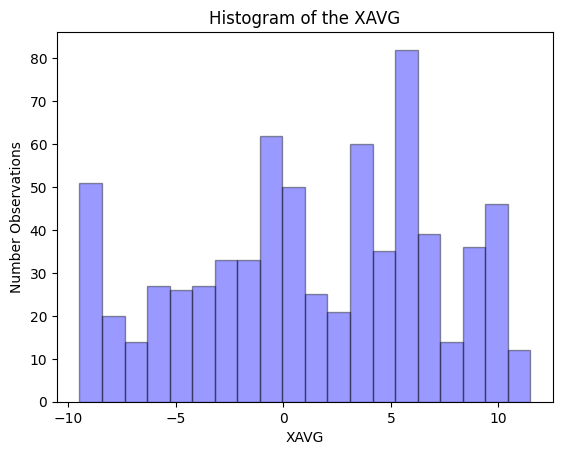

In [18]:
sns.distplot(WatchData['XAVG'], hist=True, kde=False, 
             bins=int(20), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of the XAVG')
plt.xlabel('XAVG')
plt.ylabel('Number Observations')

/tmp/ipykernel_68/2537356071.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WatchData['YAVG'], hist=True, kde=False,


Text(0, 0.5, 'Number Observations')

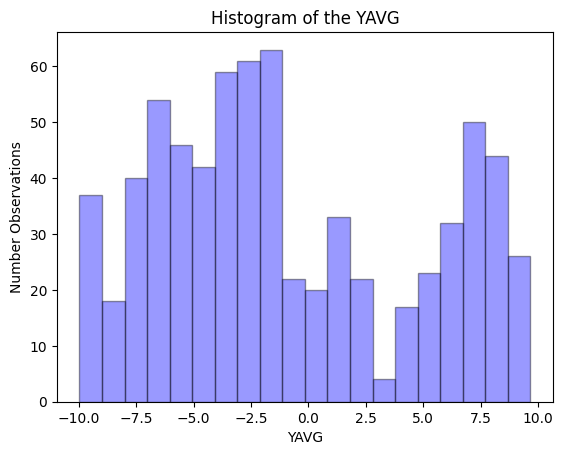

In [19]:
sns.distplot(WatchData['YAVG'], hist=True, kde=False, 
             bins=int(20), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of the YAVG')
plt.xlabel('YAVG')
plt.ylabel('Number Observations')

/tmp/ipykernel_68/4166438722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WatchData['ZAVG'], hist=True, kde=False,


Text(0, 0.5, 'Number Observations')

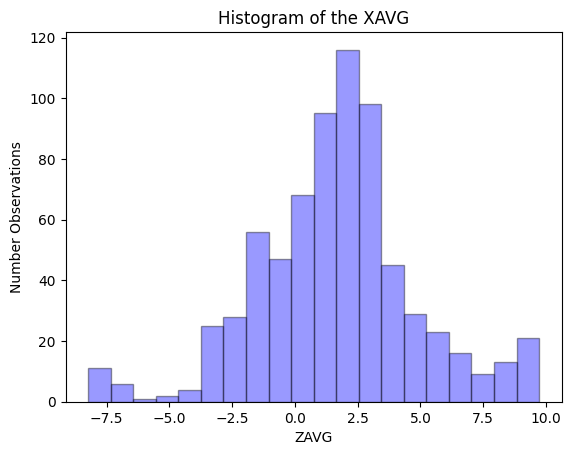

In [20]:
sns.distplot(WatchData['ZAVG'], hist=True, kde=False, 
             bins=int(20), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of the ZAVG')
plt.xlabel('ZAVG')
plt.ylabel('Number Observations')

/tmp/ipykernel_68/116180556.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WatchData['XPEAK'], hist=True, kde=False,


Text(0, 0.5, 'Number Observations')

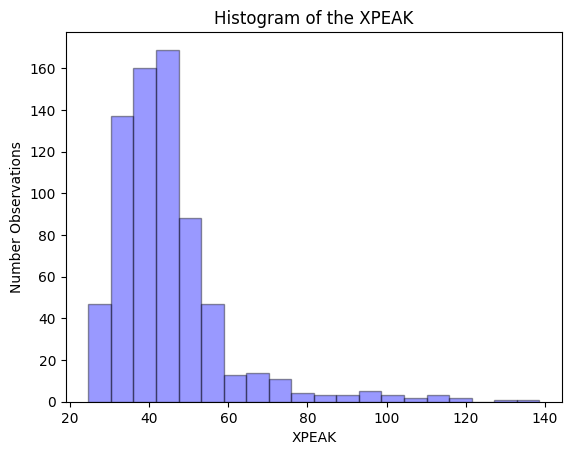

In [21]:
sns.distplot(WatchData['XPEAK'], hist=True, kde=False, 
             bins=int(20), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of the XPEAK')
plt.xlabel('XPEAK')
plt.ylabel('Number Observations')

/tmp/ipykernel_68/250241265.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WatchData['YPEAK'], hist=True, kde=False,


Text(0, 0.5, 'Number Observations')

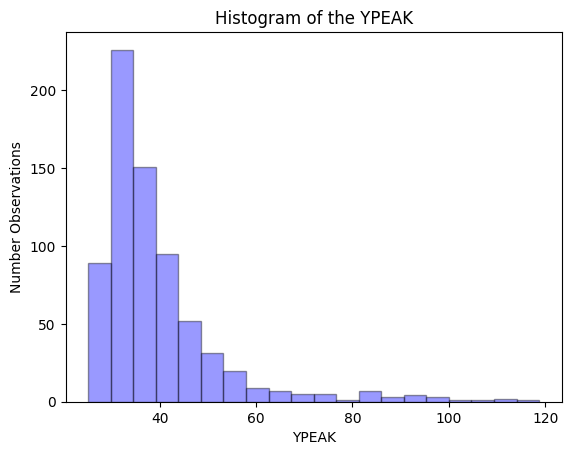

In [22]:
sns.distplot(WatchData['YPEAK'], hist=True, kde=False, 
             bins=int(20), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of the YPEAK')
plt.xlabel('YPEAK')
plt.ylabel('Number Observations')

/tmp/ipykernel_68/1268083264.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WatchData['ZPEAK'], hist=True, kde=False,


Text(0, 0.5, 'Number Observations')

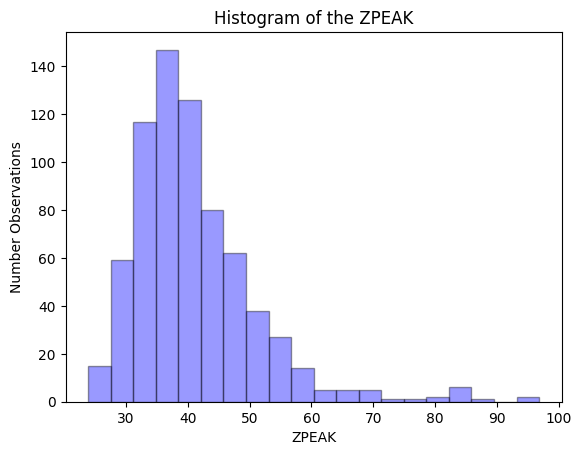

In [23]:
sns.distplot(WatchData['ZPEAK'], hist=True, kde=False, 
             bins=int(20), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of the ZPEAK')
plt.xlabel('ZPEAK')
plt.ylabel('Number Observations')

/tmp/ipykernel_68/2829999164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WatchData['XVAR'], hist=True, kde=False,


Text(0, 0.5, 'Number Observations')

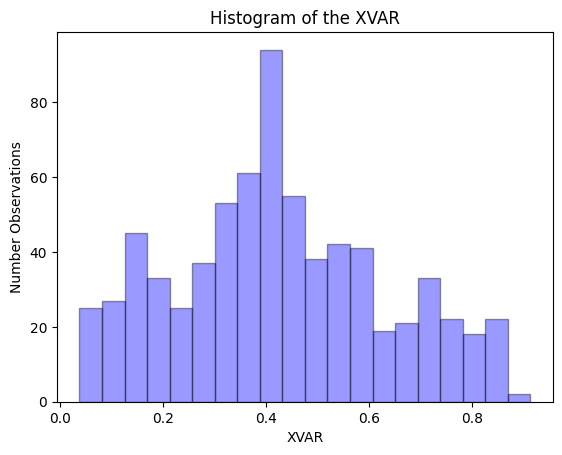

In [24]:
sns.distplot(WatchData['XVAR'], hist=True, kde=False, 
             bins=int(20), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of the XVAR')
plt.xlabel('XVAR')
plt.ylabel('Number Observations')

/tmp/ipykernel_68/2173519688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WatchData['YVAR'], hist=True, kde=False,


Text(0, 0.5, 'Number Observations')

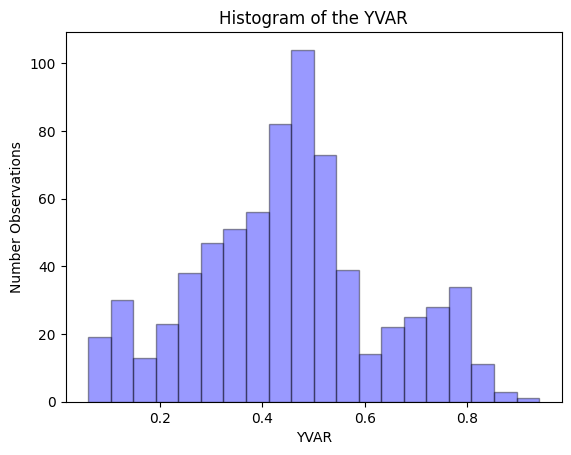

In [25]:
sns.distplot(WatchData['YVAR'], hist=True, kde=False, 
             bins=int(20), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of the YVAR')
plt.xlabel('YVAR')
plt.ylabel('Number Observations')

/tmp/ipykernel_68/2173519688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WatchData['YVAR'], hist=True, kde=False,


Text(0, 0.5, 'Number Observations')

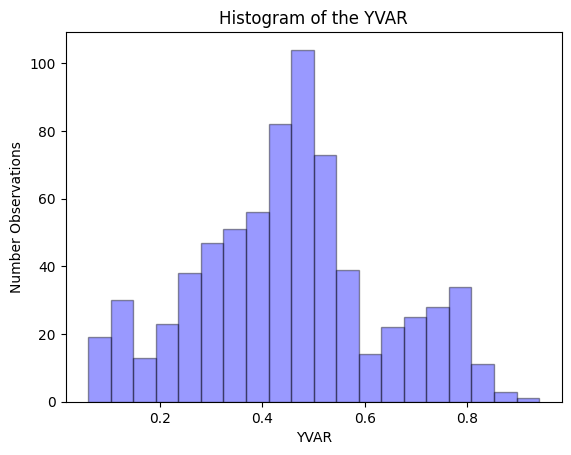

In [26]:
sns.distplot(WatchData['YVAR'], hist=True, kde=False, 
             bins=int(20), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of the YVAR')
plt.xlabel('YVAR')
plt.ylabel('Number Observations')

/tmp/ipykernel_68/817701675.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WatchData['RESULTANT'], hist=True, kde=False,


Text(0, 0.5, 'Number Observations')

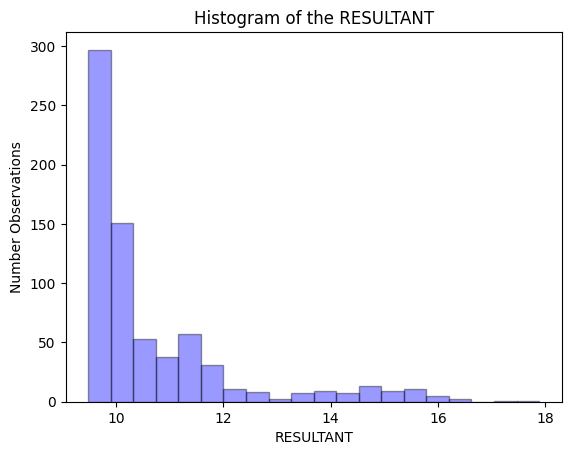

In [27]:
sns.distplot(WatchData['RESULTANT'], hist=True, kde=False, 
             bins=int(20), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of the RESULTANT')
plt.xlabel('RESULTANT')
plt.ylabel('Number Observations')

# Step2

In [23]:
# We first splitted the data for our 80-20 cross validation
train_data = training_data.sample(frac=0.8, random_state=25)
validation_data = training_data.drop(train_data.index)

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {validation_data.shape[0]}")

No. of training examples: 514
No. of testing examples: 128


## Multcollinearity

In [24]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
!pip install seaborn
import seaborn as sns
%matplotlib inline

In [25]:
Multi_data=WatchData
Multi_data

,Class,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XVAR,YVAR,ZVAR,RESULTANT,ACTIVITY
0,Person 1,9.23000,-3.22562,3.40728,40.0000,57.5758,43.4884,0.504440,0.527774,0.401989,11.55880,A
1,Person 1,7.75308,-3.62212,2.58781,43.4091,48.7179,51.3158,0.712498,0.531065,0.455501,12.09340,A
2,Person 1,8.40093,-4.04586,2.09208,41.7391,50.8108,44.3182,0.677074,0.522641,0.411418,11.96040,A
3,Person 1,11.43050,-3.77390,2.88670,40.6383,49.4872,43.8636,0.418373,0.546912,0.355470,13.27350,A
4,Person 1,10.41550,-3.66641,3.37102,46.5854,45.7143,48.0000,0.552819,0.547732,0.406682,12.89640,A
...,...,...,...,...,...,...,...,...,...,...,...,...
708,Person 2,-4.98030,-6.30830,4.07123,37.8846,31.1290,40.2083,0.324098,0.327602,0.489588,9.84407,A
709,Person 2,-3.96616,-7.75343,1.87951,36.4815,28.9552,38.9796,0.333311,0.283873,0.509983,9.82156,C
710,Person 2,-4.36883,-7.30435,2.52667,35.1786,28.5075,39.5918,0.333168,0.308339,0.513278,9.83112,S
711,Person 2,-3.90877,-7.46837,2.83919,36.7308,30.3175,37.2549,0.340969,0.275551,0.507417,9.79981,F


In [26]:
#We get rid of the categorical variables to measure correlation
del Multi_data["ACTIVITY"]
del Multi_data["Class"]

<AxesSubplot: >

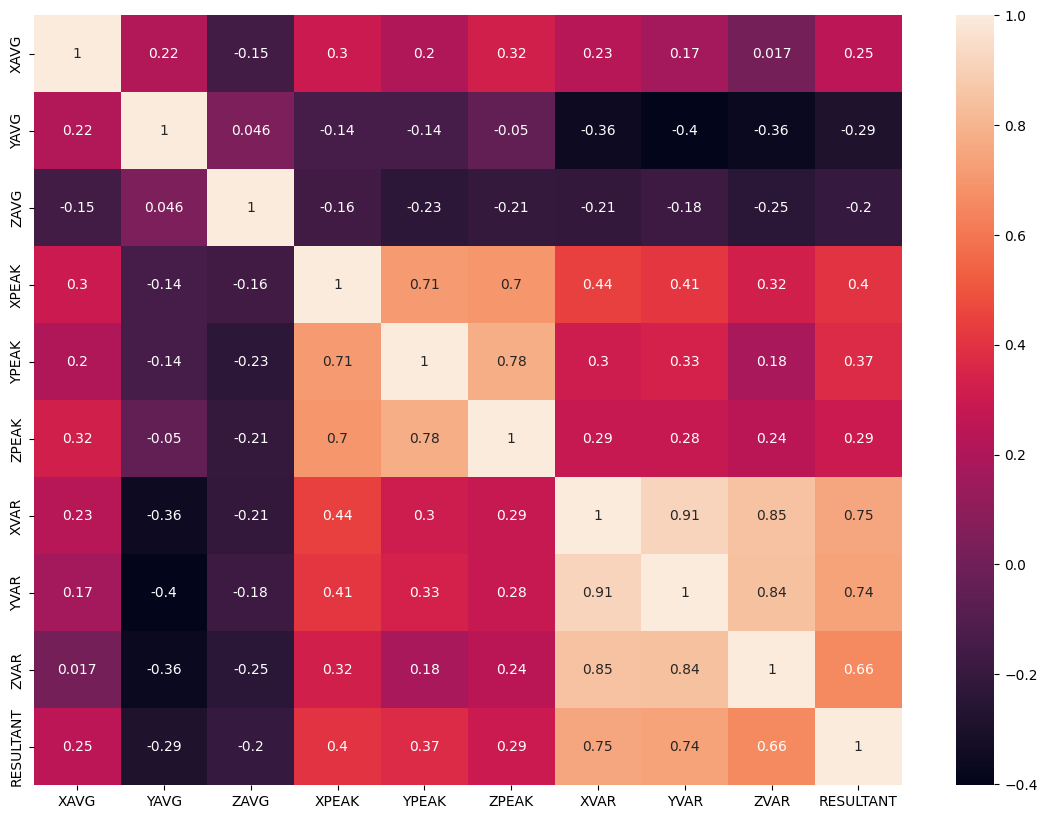

In [27]:
# We now create a correlation Matrix of our Data to look for multicollinearity in our data
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
sns.heatmap(Multi_data.corr(),annot=True)

##  Build Logit, LDA, QDA, Naïve Bayes, KNN models with cross validation

#### Logit model 80-20 cross-validation

In [28]:
# we will use the training dataset to build the logistic regression model 
y_train, X_train = dmatrices('Class~XAVG+YAVG+ZAVG+XPEAK+YPEAK+ZPEAK+XVAR+YVAR+ZVAR+RESULTANT', train_data, return_type = 'dataframe')
print(y_train)

     Class[Person 1]  Class[Person 2]
357              0.0              1.0
589              0.0              1.0
351              0.0              1.0
194              1.0              0.0
254              1.0              0.0
..               ...              ...
517              0.0              1.0
334              1.0              0.0
263              1.0              0.0
345              1.0              0.0
294              1.0              0.0

[514 rows x 2 columns]


In [29]:
# since we are interested in the authenticity of person1, we take the first column of y as our response variable 
# we build a model to predict whether it's person 1 or person 2. 
logit = sm.Logit(y_train.iloc[:,1], X_train)
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.424601
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Class[Person 2]   No. Observations:                  514
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                           10
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.3872
Time:                        17:07:08   Log-Likelihood:                -218.24
converged:                       True   LL-Null:                       -356.14
Covariance Type:            nonrobust   LLR p-value:                 2.016e-53
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2812      1.093     -1.173      0.241      -3.423       0.860
XAVG           0.0439      0.024      1.810      0.070      -0.004       0.091
YAVG           0.2536      0.031      8.238      0.000       0.193       0.314
ZAVG          -0.1868      0.039     -4.822      0.000      -0.263      -0.111
XPEAK         -0.0280      0.015     -1.858      0.063      -0.058       0.002
YPEAK         -0.1191      0.023     -5.212      0.000      -0.164      -0.074
ZPEAK          0.1899      0.029      6.619      0.000       0.134       0.246
XVAR           2.8822      1.661      1.736      0.083      -0.373       6.137
YVAR           2.5212      1.901      1.326      0.185      -1.204       6.246
ZVAR          -7.1840      1.713     -4.193      0.000     -10.542      -3.826
RESULTANT      0.0566      0.118      0.481      0.631      -0.174       0.287
==============================================================================
"""

In [30]:
# to extract the parameters directly
logit.fit().params

Optimization terminated successfully.
         Current function value: 0.424601
         Iterations 7


Intercept   -1.281249
XAVG         0.043899
YAVG         0.253641
ZAVG        -0.186825
XPEAK       -0.027999
YPEAK       -0.119070
ZPEAK        0.189906
XVAR         2.882186
YVAR         2.521184
ZVAR        -7.184032
RESULTANT    0.056553
dtype: float64

In [31]:
# to extract the probability of the person to be person 1 in the first 10 instances
logit.fit().predict()[0:10] 

Optimization terminated successfully.
         Current function value: 0.424601
         Iterations 7


array([0.57263861, 0.29090747, 0.71797018, 0.00399771, 0.37310286,
       0.31101136, 0.97656365, 0.52155913, 0.02999808, 0.11412401])

In [32]:
# in order to make a prediction as to whether is person 2 or not, 
# we must convert these predicted probabilities into class labels, person 1 (1) or person 2 (0).
# we will do this by threshold the probability by a threshold of 0.5
threshold = 0.5
predict_label = pd.DataFrame(np.zeros(shape=(514,1)), columns = ['label'])
predict_label.iloc[logit.fit().predict()>threshold] = 1

Optimization terminated successfully.
         Current function value: 0.424601
         Iterations 7


In [33]:
# we can evalue the TRAINING result by constructing a confusion matrix 
confusion_matrix(y_train.iloc[:,1], predict_label.iloc[:,0])

array([[228,  35],
       [ 51, 200]])

In [35]:
# Use the confusion matrix to compute the accuracy 
print(confusion_matrix(y_train.iloc[:,1], predict_label.iloc[:,0]).diagonal().sum()* 1.0 /confusion_matrix(y_train.iloc[:,1], predict_label.iloc[:,0]).sum())

0.8326848249027238


In [36]:
# we will use the test dataset to build the logistic regression model 
y_test, X_test = dmatrices('Class~XAVG+YAVG+ZAVG+XPEAK+YPEAK+ZPEAK+XVAR+YVAR+ZVAR+RESULTANT', validation_data, return_type = 'dataframe')

In [37]:
logit = sm.Logit(y_test.iloc[:,1], X_test)
print(logit.fit().summary())

Optimization terminated successfully.
         Current function value: 0.358117
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Class[Person 2]   No. Observations:                  128
Model:                          Logit   Df Residuals:                      117
Method:                           MLE   Df Model:                           10
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.4740
Time:                        17:07:36   Log-Likelihood:                -45.839
converged:                       True   LL-Null:                       -87.154
Covariance Type:            nonrobust   LLR p-value:                 1.529e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4415      3.292      1.349      0.177      -2.011      10.894
XAVG          -0.0101      0.

In [38]:
preds = logit.fit().predict(X_test)
predict_label = pd.DataFrame(np.zeros(shape=(X_test.shape[0],1)), columns = ['label'])
threshold = 0.5
mark = (preds > threshold).reset_index(drop=True)
predict_label.loc[mark] = 1
confusion_matrix(y_test.iloc[:,1], predict_label.iloc[:,0])

Optimization terminated successfully.
         Current function value: 0.358117
         Iterations 8


array([[62, 12],
       [18, 36]])

In [39]:
# to get accuracy
np.mean(y_test.iloc[:,1].reset_index(drop=True)==predict_label.iloc[:,0].reset_index(drop=True)) 

0.765625

#### LDA model 80-20 cross-validation

In [40]:
# we will use sklearn's implementation of LDA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
y_train.iloc[:,1].unique()

array([1., 0.])

In [41]:
y_train.iloc[:,1]

357    1.0
589    1.0
351    1.0
194    0.0
254    0.0
      ... 
517    1.0
334    0.0
263    0.0
345    0.0
294    0.0
Name: Class[Person 2], Length: 514, dtype: float64

In [42]:
X_train.iloc[:,0:11]

,Intercept,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XVAR,YVAR,ZVAR,RESULTANT
357,1.0,10.704500,-2.21905,0.982108,41.9149,38.4314,38.0000,0.365936,0.365301,0.309757,11.19430
589,1.0,-2.900400,-5.37433,-2.785970,45.2381,41.3333,41.8182,0.597420,0.691054,0.627051,11.44960
351,1.0,10.915600,-2.34888,0.939455,40.8889,44.7619,46.0976,0.377213,0.369548,0.339454,11.45750
194,1.0,-4.844720,-6.21669,0.138983,81.3043,81.6667,50.2857,0.473196,0.533581,0.449494,9.71982
254,1.0,0.862035,-5.27075,1.106060,48.0000,41.7021,42.3913,0.849369,0.742699,0.634916,13.57650
...,...,...,...,...,...,...,...,...,...,...,...
517,1.0,5.740050,7.56083,0.326898,39.5833,36.8627,40.6250,0.318549,0.333552,0.351524,9.85906
334,1.0,0.516160,-7.13439,-0.715507,37.4510,30.9524,34.2105,0.537163,0.519102,0.655096,10.53030
263,1.0,0.650023,-2.73732,1.158720,57.5758,45.2381,38.0000,0.781360,0.731876,0.775470,13.27440
345,1.0,2.783390,-6.62922,-2.064640,40.0000,35.6364,40.6250,0.604880,0.563364,0.604905,10.82630


In [43]:
# the training process 
sklearn_lda = LDA(n_components=1) #creating a LDA object
lda = sklearn_lda.fit(X_train.iloc[:,1:11], y_train.iloc[:,1]) #learning the projection matrix
X_lda = lda.transform(X_train.iloc[:,1:11]) #using the model to project X 
X_labels = lda.predict(X_train.iloc[:,1:11]) #gives you the predicted label for each sample
X_prob = lda.predict_proba(X_train.iloc[:,1:11]) #the probability of each sample to belong to each class

In [44]:
X_prob

array([[0.36233945, 0.63766055],
       [0.80703666, 0.19296334],
       [0.23912947, 0.76087053],
       ...,
       [0.94936746, 0.05063254],
       [0.74054166, 0.25945834],
       [0.86238901, 0.13761099]])

In [45]:
# testing step 
X_test_labels =lda.predict(X_test.iloc[:,1:11])
X_test_prob = lda.predict_proba(X_test.iloc[:,1:11]) 
print(X_test_prob[0:5,:])

[[0.90515093 0.09484907]
 [0.75925679 0.24074321]
 [0.56178868 0.43821132]
 [0.14802783 0.85197217]
 [0.58544313 0.41455687]]


In [46]:
y_test.iloc[:,1]

105    0.0
276    0.0
236    0.0
394    1.0
51     0.0
      ... 
29     0.0
214    0.0
622    1.0
79     0.0
451    1.0
Name: Class[Person 2], Length: 128, dtype: float64

In [47]:
# get the accuracy of the test set using a threshold of 0.5
threshold=0.5
np.mean(y_test.iloc[:,1]==X_test_labels) 

0.8125

In [48]:
threshold = 0.5
confusion_matrix(y_test.iloc[:,0],X_test_prob[:,0]>=threshold)
cm = pd.DataFrame(confusion_matrix(y_test.iloc[:,0],X_test_prob[:,0]>=threshold).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm

,No,Yes
No,38,8
Yes,16,66


#### QDA model 80-20 cross-validation

In [49]:
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
sklearn_qda = QDA(priors=None,store_covariance=True) #creating a QDA object
qda = sklearn_qda.fit(X_train.iloc[:,1:11], y_train.iloc[:,1]) #learning the projection matrix
X_labels = qda.predict(X_train.iloc[:,1:11]) #gives you the predicted label for each sample
X_prob = qda.predict_proba(X_train.iloc[:,1:11]) #the probability of each sample to belong to each class

X_test_labels=qda.predict(X_test.iloc[:,1:11])
X_test_prob = qda.predict_proba(X_test.iloc[:,1:11]) 

print(np.mean(y_test.iloc[:,1]==X_test_labels))

0.8828125


In [50]:
threshold = 0.5
confusion_matrix(y_test.iloc[:,1],X_test_prob[:,1]>=threshold)

array([[66,  8],
       [ 7, 47]])

In [51]:
cm = pd.DataFrame(confusion_matrix(y_test.iloc[:,0],X_test_prob[:,0]>=threshold).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm

,No,Yes
No,47,8
Yes,7,66


#### Naive Bayes model 80-20 cross-validation

In [52]:
# from sklearn.naive_bayes import GaussianNB as NB
NB_class = NB()
NB_class.fit(X_train.iloc[:,1:11], y_train.iloc[:,1])
X_test_labels=NB_class.predict(X_test.iloc[:,1:11])
X_test_prob = NB_class.predict_proba(X_test.iloc[:,1:11]) 
print(np.mean(y_test.iloc[:,1]==X_test_labels))


0.734375


In [53]:
threshold = 0.5
confusion_matrix(y_test.iloc[:,0],X_test_prob[:,0]>=threshold)

array([[43, 11],
       [23, 51]])

In [54]:
cm = pd.DataFrame(confusion_matrix(y_test.iloc[:,0],X_test_prob[:,0]>=threshold).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm

,No,Yes
No,43,23
Yes,11,51


#### KNN model 80-20 cross-validation

In [55]:
# from sklearn.neighbors import KNeighborsClassifier as KNN
neigh = KNN(n_neighbors= 5) # use n_neighbors to change the # of tune the performance of KNN
KNN_fit = neigh.fit(X_train.iloc[:,1:11], y_train.iloc[:,1]) #learning the projection matrix
X_test_labels=KNN_fit.predict(X_test.iloc[:,1:11])
X_test_prob = KNN_fit.predict_proba(X_test.iloc[:,1:11]) 
print(np.mean(y_test.iloc[:,1]==X_test_labels))

#dir(neigh) # use dir command to check what KNN offers

0.9296875


In [56]:
threshold = 0.5
confusion_matrix(y_test.iloc[:,1],X_test_prob[:,1]>=threshold)

array([[68,  6],
       [ 3, 51]])

In [57]:
cm = pd.DataFrame(confusion_matrix(y_test.iloc[:,1],X_test_prob[:,1]>=threshold).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm

,No,Yes
No,68,3
Yes,6,51


## 10 Fold cross validation results

### logit 10 fold cross validation

In [58]:
# Prepare the data
y, X = dmatrices('Class~XAVG+YAVG+ZAVG+XPEAK+YPEAK+ZPEAK+XVAR+YVAR+ZVAR+RESULTANT', training_data, return_type='dataframe')
y = y.iloc[:, 1].values

np.random.seed(0)
n_split = 10
k_fold = KFold(n_splits=n_split)

accuracy_list = []

for train_index, test_index in k_fold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the Logit model
    logit = sm.Logit(y_train, X_train)
    result = logit.fit(disp=0)

    # Predict on the test dataset
    preds = result.predict(X_test)
    threshold = 0.5
    y_pred = (preds > threshold).astype(int)

    # Calculate the accuracy
    accuracy = np.mean(y_test == y_pred)
    accuracy_list.append(accuracy)
    # to get average accuracy
average_accuracy = np.mean(accuracy_list)
print(f"Average accuracy: {average_accuracy}")

Average accuracy: 0.8193509615384615


### 10-fold cross-validation for LDA

In [59]:
lda = LDA()
lda_accuracy = cross_val_score(lda, X, y, cv=k_fold, scoring="accuracy")
print(f"Average accuracy (LDA): {np.mean(lda_accuracy)}")

Average accuracy (LDA): 0.8131009615384615


### 10-fold cross-validation for QDA

In [60]:
X = X_train.iloc[:,1:11]
y = y_train

sklearn_qda = QDA(priors=None, store_covariance=True)

kf = KFold(n_splits=10, shuffle=True, random_state=0)

accuracy_list = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    qda = sklearn_qda.fit(X_train_cv, y_train_cv)

    X_test_labels = qda.predict(X_test_cv)
    X_test_prob = qda.predict_proba(X_test_cv)

    accuracy = np.mean(y_test_cv == X_test_labels)
    accuracy_list.append(accuracy)

qda_accuracy = np.mean(accuracy_list)
print(f"Average accuracy (QDA): {np.mean(qda_accuracy)}")

Average accuracy (QDA): 0.9169388989715669


### 10-fold cross-validation for Naive Bayes

In [61]:
nb = NB()
nb_accuracy = cross_val_score(nb, X, y, cv=k_fold, scoring="accuracy")
print(f"Average accuracy (Naive Bayes): {np.mean(nb_accuracy)}")

Average accuracy (Naive Bayes): 0.7751058681185723


### 10-fold cross-validation for KNN

In [62]:
knn = KNN()
knn_accuracy = cross_val_score(knn, X, y, cv=k_fold, scoring="accuracy")
print(f"Average accuracy (KNN): {np.mean(knn_accuracy)}")

Average accuracy (KNN): 0.9273442226255293


## Regularization Methods

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd 
import math
import random
import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA 
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.preprocessing import StandardScaler, scale 
from sklearn import linear_model 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
max_feature = 11

In [64]:
# do some feature engineering to prepare for the model training
WatchData = pd.read_csv('/home/jovyan/mid_project/NEWmerged.csv', header=0)
WatchData['label'] = WatchData['Class'] == "Person 1"
training_data = WatchData.sample(frac=0.9, random_state=25)
print(list(training_data)) # get the header of this data
print(training_data.shape) # get the dimension of this 
training_data.head() # pull a sample of this dataset

['Class', 'XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XVAR', 'YVAR', 'ZVAR', 'RESULTANT', 'ACTIVITY', 'label']
(642, 13)


,Class,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XVAR,YVAR,ZVAR,RESULTANT,ACTIVITY,label
153,Person 1,-5.28946,-1.51346,5.562830,31.1111,31.8644,31.3115,0.399393,0.608256,0.456229,10.01530,I,True
242,Person 1,9.61315,-3.38037,1.860200,47.0732,47.8947,47.0732,0.514246,0.478662,0.423773,11.22820,M,True
454,Person 2,3.29881,6.51685,6.470920,35.0000,29.8485,33.3333,0.162849,0.241471,0.218491,9.81234,F,False
655,Person 2,1.41707,7.90551,0.323367,48.7500,35.2727,34.9091,0.560060,0.423212,0.541532,10.19880,S,False
531,Person 2,5.29846,6.61931,2.537780,43.0952,35.1786,39.7917,0.436097,0.450649,0.352184,9.83467,K,False


In [65]:
# do some feature engineering to prepare for the model training
y = training_data.label
#take care of the features, change category into dummy variables, Choose (n-1) dummy variable into the feature set: n is the unique values of each categorical variable.
X = pd.get_dummies(training_data, columns=['ACTIVITY']).drop(['Class', 'label'], axis=1)
X.head()

,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XVAR,YVAR,ZVAR,RESULTANT,...,ACTIVITY_I,ACTIVITY_J,ACTIVITY_K,ACTIVITY_L,ACTIVITY_M,ACTIVITY_O,ACTIVITY_P,ACTIVITY_Q,ACTIVITY_R,ACTIVITY_S
153,-5.28946,-1.51346,5.562830,31.1111,31.8644,31.3115,0.399393,0.608256,0.456229,10.01530,...,1,0,0,0,0,0,0,0,0,0
242,9.61315,-3.38037,1.860200,47.0732,47.8947,47.0732,0.514246,0.478662,0.423773,11.22820,...,0,0,0,0,1,0,0,0,0,0
454,3.29881,6.51685,6.470920,35.0000,29.8485,33.3333,0.162849,0.241471,0.218491,9.81234,...,0,0,0,0,0,0,0,0,0,0
655,1.41707,7.90551,0.323367,48.7500,35.2727,34.9091,0.560060,0.423212,0.541532,10.19880,...,0,0,0,0,0,0,0,0,0,1
531,5.29846,6.61931,2.537780,43.0952,35.1786,39.7917,0.436097,0.450649,0.352184,9.83467,...,0,0,1,0,0,0,0,0,0,0


### Forward Subset 

In [66]:
'''
Since in Python there is no well-defined function for best subset selection, 
we will need to define some functions ourselves.
1. Define a function to run on a subset of feature and extract RSS
2. Select the best model (models) for a fix number of features
'''
def getRSS(y, X, feature_list):
    model = sm.OLS(y, X[list(feature_list)]).fit()
    RSS = ((model.predict(X[list(feature_list)]) - y) ** 2).sum()
    return {'Model':model, "RSS":RSS}

def bestModel(y, X, K):
    results = []
    for c in itertools.combinations(X.columns, K):
        results.append(getRSS(y, X, c))     
    model_all =  pd.DataFrame(results)
    
    best_model = model_all.loc[model_all["RSS"].idxmin()] ## this could be modified to have the top several models
    return best_model

In [67]:
# to add 1 feature at a time (start from 0 feature) for forward stepwise selection 
def forward_select(y, X, feature_list):
    remaining_predictors = [p for p in X.columns if p not in feature_list]
    results = []
    for p in remaining_predictors:
        results.append(getRSS(y, X, feature_list+[p]))

    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].idxmin()]
    return best_model  

In [68]:
models2 = pd.DataFrame(columns=["RSS", "Model"])
feature_list = []
for i in range(1,len(X.columns)+1):
    models2.loc[i] = forward_select(y, X, feature_list)
    feature_list = models2.loc[i]["Model"].model.exog_names

In [69]:
# we can see the result of the forward selection
print('Best max_feature variable from forward selection on tranining')
print(models2.loc[max_feature, 'Model'].params)

Best max_feature variable from forward selection on tranining
ZVAR          0.750647
YAVG         -0.041991
ZAVG          0.027721
ACTIVITY_E    0.128342
XAVG         -0.016634
YPEAK         0.015921
ACTIVITY_O   -0.495695
ZPEAK        -0.020559
ACTIVITY_B   -0.565694
ACTIVITY_P   -0.369586
RESULTANT     0.041046
dtype: float64


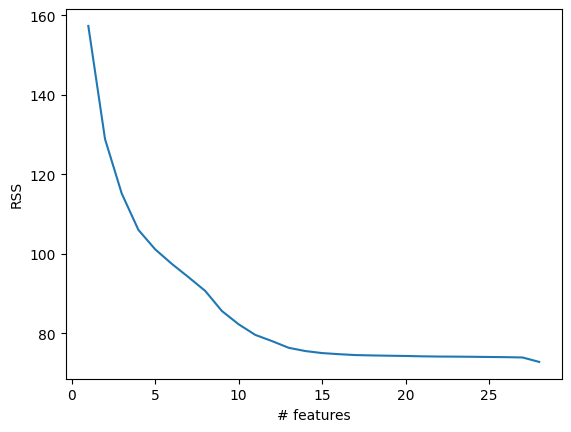

In [70]:
# this show an example to plot the RSS of best models with different number of parameters
plt.figure()
plt.plot(models2["RSS"])
plt.xlabel('# features')
plt.ylabel('RSS')
plt.show()

### Ridge

In [71]:
# do some feature engineering to prepare for the model training
y = training_data.label
#take care of the features, change category into dummy variables, Choose (n-1) dummy variable into the feature set: n is the unique values of each categorical variable.
dummies = pd.get_dummies(training_data[['ACTIVITY']])

X_prep = training_data.drop (['ACTIVITY', 'Class', 'label'], axis = 1).astype('float64')
X = pd.concat([X_prep,  dummies[['ACTIVITY_A','ACTIVITY_B','ACTIVITY_C','ACTIVITY_D','ACTIVITY_E','ACTIVITY_F','ACTIVITY_G',
                                 'ACTIVITY_H','ACTIVITY_I','ACTIVITY_J','ACTIVITY_K','ACTIVITY_L','ACTIVITY_M','ACTIVITY_O','ACTIVITY_P','ACTIVITY_Q','ACTIVITY_R','ACTIVITY_S']]], axis=1)

In [72]:
# next, we will generate a few canadidates regularization strength(in sklearn, the keyword is alphas) 
alphas = 10**np.linspace(10,-2,100)
print(alphas)
X

[1.00000000e+10 7.56463328e+09 5.72236766e+09 4.32876128e+09
 3.27454916e+09 2.47707636e+09 1.87381742e+09 1.41747416e+09
 1.07226722e+09 8.11130831e+08 6.13590727e+08 4.64158883e+08
 3.51119173e+08 2.65608778e+08 2.00923300e+08 1.51991108e+08
 1.14975700e+08 8.69749003e+07 6.57933225e+07 4.97702356e+07
 3.76493581e+07 2.84803587e+07 2.15443469e+07 1.62975083e+07
 1.23284674e+07 9.32603347e+06 7.05480231e+06 5.33669923e+06
 4.03701726e+06 3.05385551e+06 2.31012970e+06 1.74752840e+06
 1.32194115e+06 1.00000000e+06 7.56463328e+05 5.72236766e+05
 4.32876128e+05 3.27454916e+05 2.47707636e+05 1.87381742e+05
 1.41747416e+05 1.07226722e+05 8.11130831e+04 6.13590727e+04
 4.64158883e+04 3.51119173e+04 2.65608778e+04 2.00923300e+04
 1.51991108e+04 1.14975700e+04 8.69749003e+03 6.57933225e+03
 4.97702356e+03 3.76493581e+03 2.84803587e+03 2.15443469e+03
 1.62975083e+03 1.23284674e+03 9.32603347e+02 7.05480231e+02
 5.33669923e+02 4.03701726e+02 3.05385551e+02 2.31012970e+02
 1.74752840e+02 1.321941

,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XVAR,YVAR,ZVAR,RESULTANT,...,ACTIVITY_I,ACTIVITY_J,ACTIVITY_K,ACTIVITY_L,ACTIVITY_M,ACTIVITY_O,ACTIVITY_P,ACTIVITY_Q,ACTIVITY_R,ACTIVITY_S
153,-5.289460,-1.51346,5.562830,31.1111,31.8644,31.3115,0.399393,0.608256,0.456229,10.01530,...,1,0,0,0,0,0,0,0,0,0
242,9.613150,-3.38037,1.860200,47.0732,47.8947,47.0732,0.514246,0.478662,0.423773,11.22820,...,0,0,0,0,1,0,0,0,0,0
454,3.298810,6.51685,6.470920,35.0000,29.8485,33.3333,0.162849,0.241471,0.218491,9.81234,...,0,0,0,0,0,0,0,0,0,0
655,1.417070,7.90551,0.323367,48.7500,35.2727,34.9091,0.560060,0.423212,0.541532,10.19880,...,0,0,0,0,0,0,0,0,0,1
531,5.298460,6.61931,2.537780,43.0952,35.1786,39.7917,0.436097,0.450649,0.352184,9.83467,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,5.740050,7.56083,0.326898,39.5833,36.8627,40.6250,0.318549,0.333552,0.351524,9.85906,...,0,1,0,0,0,0,0,0,0,0
685,-8.870200,-3.34848,0.975901,41.3043,34.2105,43.5556,0.211943,0.298638,0.387309,9.85571,...,0,0,0,0,0,0,0,0,0,1
79,5.069220,1.67523,-8.225230,32.8333,32.7119,27.9412,0.080105,0.107664,0.082907,9.80808,...,0,0,0,0,0,0,0,0,0,0
451,3.362970,7.10657,5.778170,37.4510,34.0351,38.3673,0.147915,0.192259,0.206871,9.79058,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# associated with each value of alpha is a vector of ridge regression coefficients, 
# stored in a matrix that can be accessed by coeffs. In this case, it is a 29×100, 
# 29 is the dimension of the features + (intercept needs to call separately) and 100 
# is the len of the alphas. The result is a numpy series with len 100 and len(coffes[0]) is 29. 
# In this specific implementation, the default is no intercept. 
# here I used list to store them, we could also use dictionary to store them as we did before.
ridge = Ridge(fit_intercept=True)
coeffs = []
intercepts = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coeffs.append(ridge.coef_)
    intercepts.append(ridge.intercept_)

In [74]:
print(len(coeffs))
print(len(coeffs[0]))
print(len(intercepts))
print(intercepts[0])

100
28
100
0.5249221153007476


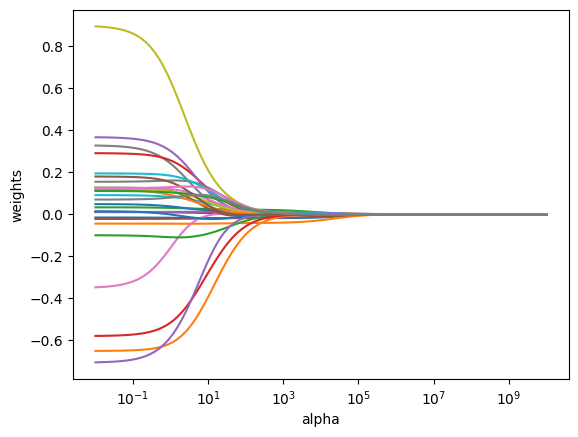

In [75]:
# as design, as alphas get bigger, magnitude of coefficients turn to be closer to zero. 
# one thing to remember is that the decay is quite smooth
ax = plt.gca()
ax.plot(alphas, coeffs)
"""
Typically, we scale the alpha in log scale.
Try to plot it without. 
"""
ax.set_xscale('log') 
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [76]:
# we now split the samples into a training set and a test set in order to estimate 
# the test error of ridge regression and the lasso. 
# Python provides a built-in function to produce training and test data set.
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.66)

In [77]:
# train the model and do prediction on test dataset
ridge = Ridge(fit_intercept=True, alpha=4)
ridge.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))        # Calculate the test MSE

XAVG         -0.019527
YAVG         -0.045665
ZAVG          0.016095
XPEAK         0.004976
YPEAK         0.009980
ZPEAK        -0.021926
XVAR          0.011932
YVAR          0.035412
ZVAR          0.249138
RESULTANT     0.036508
ACTIVITY_A    0.040893
ACTIVITY_B   -0.380561
ACTIVITY_C   -0.136014
ACTIVITY_D    0.292538
ACTIVITY_E    0.069260
ACTIVITY_F    0.031721
ACTIVITY_G    0.073394
ACTIVITY_H    0.106666
ACTIVITY_I    0.039020
ACTIVITY_J    0.075738
ACTIVITY_K   -0.084125
ACTIVITY_L    0.011715
ACTIVITY_M    0.062711
ACTIVITY_O   -0.265480
ACTIVITY_P   -0.065661
ACTIVITY_Q   -0.014714
ACTIVITY_R    0.078124
ACTIVITY_S    0.064774
dtype: float64
0.13315029429584355


In [78]:
# to select best alpha, we will use cross validation. 
# as standard, we will report test set performance as the final performance metric
ridgecv =  RidgeCV(alphas, scoring='neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.49770235643321137

In [79]:
# produce the mean squred error of the selected alpha on test dataset
ridge_best = Ridge(alpha=ridgecv.alpha_)
ridge_best.fit(X_train, y_train)
mean_squared_error(y_test, ridge_best.predict(X_test))

0.13010738708161076

In [80]:
# we can exame the values of the coefficients 
"""
If we exam the values of the coefficients, most of them are tiny, but none of them is zero.
This is a diff between ridge and lasso. Ridge shrinks the coefficients proportionally.
"""
pd.Series(ridge_best.coef_, index=X.columns)

XAVG         -0.017405
YAVG         -0.048042
ZAVG          0.018680
XPEAK         0.006292
YPEAK         0.011151
ZPEAK        -0.023784
XVAR         -0.059453
YVAR          0.007655
ZVAR          0.871327
RESULTANT     0.048052
ACTIVITY_A    0.042290
ACTIVITY_B   -0.567372
ACTIVITY_C   -0.199049
ACTIVITY_D    0.494565
ACTIVITY_E    0.211898
ACTIVITY_F    0.136312
ACTIVITY_G    0.121297
ACTIVITY_H    0.160282
ACTIVITY_I    0.114931
ACTIVITY_J    0.096343
ACTIVITY_K   -0.067535
ACTIVITY_L    0.058152
ACTIVITY_M    0.091991
ACTIVITY_O   -0.505320
ACTIVITY_P   -0.344213
ACTIVITY_Q    0.084822
ACTIVITY_R    0.049615
ACTIVITY_S    0.020989
dtype: float64

### Lasso

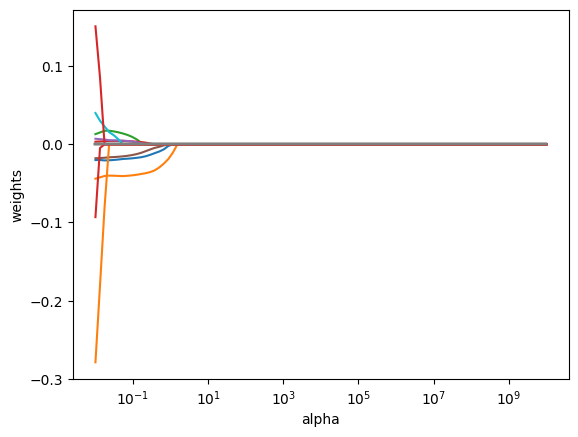

0.13155051790699254

In [81]:
# same precedure as before, we will use cross validation to select the best alpha
lasso= Lasso( max_iter=100000) 
coeffs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coeffs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

In [82]:
# some of the coefficients should reduce to exact zero
pd.Series(lasso.coef_, index=X.columns)

XAVG         -0.018085
YAVG         -0.046717
ZAVG          0.016870
XPEAK         0.005305
YPEAK         0.011243
ZPEAK        -0.022948
XVAR         -0.000000
YVAR         -0.000000
ZVAR          0.709856
RESULTANT     0.034127
ACTIVITY_A   -0.000000
ACTIVITY_B   -0.571464
ACTIVITY_C   -0.223963
ACTIVITY_D    0.380505
ACTIVITY_E    0.078756
ACTIVITY_F    0.023981
ACTIVITY_G    0.023204
ACTIVITY_H    0.035762
ACTIVITY_I    0.000000
ACTIVITY_J    0.000000
ACTIVITY_K   -0.122538
ACTIVITY_L   -0.000000
ACTIVITY_M    0.000000
ACTIVITY_O   -0.494330
ACTIVITY_P   -0.271413
ACTIVITY_Q   -0.000000
ACTIVITY_R   -0.000000
ACTIVITY_S   -0.000000
dtype: float64

## Bootstrap

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd 
import math
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from collections import OrderedDict
import sklearn.linear_model as lm

In [84]:
# For the bootstrap we are going to see the coefficient for the linear regression for person 1 as the dependent variable y
WatchData = pd.read_csv('/home/jovyan/mid_project/NEWmerged.csv', header=0)
WatchData['label'] = WatchData['Class'] == "Person 1"

In [85]:
bootstrap_data = pd.get_dummies(WatchData, columns=['ACTIVITY','Class']).drop(['label'], axis=1)
bootstrap_data

,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XVAR,YVAR,ZVAR,RESULTANT,...,ACTIVITY_K,ACTIVITY_L,ACTIVITY_M,ACTIVITY_O,ACTIVITY_P,ACTIVITY_Q,ACTIVITY_R,ACTIVITY_S,Class_Person 1,Class_Person 2
0,9.23000,-3.22562,3.40728,40.0000,57.5758,43.4884,0.504440,0.527774,0.401989,11.55880,...,0,0,0,0,0,0,0,0,1,0
1,7.75308,-3.62212,2.58781,43.4091,48.7179,51.3158,0.712498,0.531065,0.455501,12.09340,...,0,0,0,0,0,0,0,0,1,0
2,8.40093,-4.04586,2.09208,41.7391,50.8108,44.3182,0.677074,0.522641,0.411418,11.96040,...,0,0,0,0,0,0,0,0,1,0
3,11.43050,-3.77390,2.88670,40.6383,49.4872,43.8636,0.418373,0.546912,0.355470,13.27350,...,0,0,0,0,0,0,0,0,1,0
4,10.41550,-3.66641,3.37102,46.5854,45.7143,48.0000,0.552819,0.547732,0.406682,12.89640,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,-4.98030,-6.30830,4.07123,37.8846,31.1290,40.2083,0.324098,0.327602,0.489588,9.84407,...,0,0,0,0,0,0,0,0,0,1
709,-3.96616,-7.75343,1.87951,36.4815,28.9552,38.9796,0.333311,0.283873,0.509983,9.82156,...,0,0,0,0,0,0,0,0,0,1
710,-4.36883,-7.30435,2.52667,35.1786,28.5075,39.5918,0.333168,0.308339,0.513278,9.83112,...,0,0,0,0,0,0,0,1,0,1
711,-3.90877,-7.46837,2.83919,36.7308,30.3175,37.2549,0.340969,0.275551,0.507417,9.79981,...,0,0,0,0,0,0,0,0,0,1


In [86]:
X = bootstrap_data.loc[:, ["XAVG", "YAVG",'ZAVG','XPEAK','YPEAK','ZPEAK','XVAR','YVAR','ZVAR','RESULTANT','ACTIVITY_A','ACTIVITY_B','ACTIVITY_C','ACTIVITY_D','ACTIVITY_E','ACTIVITY_F','ACTIVITY_G','ACTIVITY_H','ACTIVITY_I','ACTIVITY_J','ACTIVITY_K','ACTIVITY_L','ACTIVITY_M','ACTIVITY_O','ACTIVITY_P','ACTIVITY_Q','ACTIVITY_R','ACTIVITY_S']]
X.head()

,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XVAR,YVAR,ZVAR,RESULTANT,...,ACTIVITY_I,ACTIVITY_J,ACTIVITY_K,ACTIVITY_L,ACTIVITY_M,ACTIVITY_O,ACTIVITY_P,ACTIVITY_Q,ACTIVITY_R,ACTIVITY_S
0,9.23000,-3.22562,3.40728,40.0000,57.5758,43.4884,0.504440,0.527774,0.401989,11.5588,...,0,0,0,0,0,0,0,0,0,0
1,7.75308,-3.62212,2.58781,43.4091,48.7179,51.3158,0.712498,0.531065,0.455501,12.0934,...,0,0,0,0,0,0,0,0,0,0
2,8.40093,-4.04586,2.09208,41.7391,50.8108,44.3182,0.677074,0.522641,0.411418,11.9604,...,0,0,0,0,0,0,0,0,0,0
3,11.43050,-3.77390,2.88670,40.6383,49.4872,43.8636,0.418373,0.546912,0.355470,13.2735,...,0,0,0,0,0,0,0,0,0,0
4,10.41550,-3.66641,3.37102,46.5854,45.7143,48.0000,0.552819,0.547732,0.406682,12.8964,...,0,0,0,0,0,0,0,0,0,0


In [87]:
y = bootstrap_data.loc[:, "Class_Person 1"]


0    1
1    1
2    1
3    1
4    1
Name: Class_Person 1, dtype: uint8

In [90]:
# Normal linear regression
linear_model = sm.OLS(y,X)
result = linear_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Class_Person 1   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     31.43
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          2.95e-101
Time:                        17:10:05   Log-Likelihood:                -229.09
No. Observations:                 713   AIC:                             514.2
Df Residuals:                     685   BIC:                             642.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAVG          -0.0147      0.004     -4.161      0.000      -0.022      -0.008
YAVG          -0.0456      0.003    -14.541      0.000      -0.052      -0.039
ZAVG           0.0315      0.006      5.186      0.000       0.020       0.043
XPEAK          0.0091      0.002      4.934      0.000       0.005       0.013
YPEAK          0.0104      0.002      4.616      0.000       0.006       0.015
ZPEAK         -0.0227      0.003     -8.672      0.000      -0.028      -0.018
XVAR          -0.3188      0.222     -1.433      0.152      -0.756       0.118
YVAR           0.2868      0.255      1.126      0.260      -0.213       0.787
ZVAR           0.8983      0.225      3.996      0.000       0.457       1.340
RESULTANT      0.0946      0.020      4.756      0.000       0.056       0.134
ACTIVITY_A    -0.7793      0.200     -3.891      0.000      -1.173      -0.386
ACTIVITY_B    -1.4589      0.230     -6.353      0.000      -1.910      -1.008
ACTIVITY_C    -0.8892      0.191     -4.648      0.000      -1.265      -0.514
ACTIVITY_D    -0.4863      0.199     -2.444      0.015      -0.877      -0.096
ACTIVITY_E    -0.4435      0.189     -2.350      0.019      -0.814      -0.073
ACTIVITY_F    -0.6755      0.199     -3.396      0.001      -1.066      -0.285
ACTIVITY_G    -0.6892      0.197     -3.491      0.001      -1.077      -0.302
ACTIVITY_H    -0.6776      0.192     -3.537      0.000      -1.054      -0.301
ACTIVITY_I    -0.6734      0.192     -3.514      0.000      -1.050      -0.297
ACTIVITY_J    -0.6113      0.188     -3.260      0.001      -0.979      -0.243
ACTIVITY_K    -0.7906      0.186     -4.240      0.000      -1.157      -0.424
ACTIVITY_L    -0.7004      0.186     -3.763      0.000      -1.066      -0.335
ACTIVITY_M    -0.6952      0.196     -3.547      0.000      -1.080      -0.310
ACTIVITY_O    -1.3653      0.227     -6.021      0.000      -1.811      -0.920
ACTIVITY_P    -1.5557      0.257     -6.044      0.000      -2.061      -1.050
ACTIVITY_Q    -0.6446      0.192     -3.362      0.001      -1.021      -0.268
ACTIVITY_R    -0.6864      0.207     -3.313      0.001      -1.093      -0.280
ACTIVITY_S    -0.7756      0.192     -4.040      0.000      -1.153      -0.399
==============================================================================
Omnibus:                       10.197   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               15.185
Skew:                          -0.092   Prob(JB):                     0.000504
Kurtosis:                       3.691   Cond. No.                     4.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+03. This might indi

In [91]:
bootstrap_data = pd.get_dummies(WatchData, columns=['ACTIVITY','Class']).drop(['label'], axis=1)


In [92]:
# In our bootstrapping methods and analysis, we will focus on the coefficient of RESULTANT. We would like to explore the partial relationship between Person1 and RESULTANT holding all the other variables constant
def simple_resample(n): 
    return(np.random.randint(low = 0, high = n, size = n))

def bootstrap(boot_pop, statistic, resample = simple_resample, replicates = 1000):
    n = len(boot_pop)
    resample_estimates = np.array([statistic(boot_pop[resample(n)]) for _ in range(replicates)])
    return resample_estimates


In [93]:
def RESULTANT_coeff(data_array):
    X = data_array[:, 9:10]
    y = data_array[:, 28:29]
    
    linear_model = lm.LinearRegression()
    model = linear_model.fit(X, y)
    theta_RESULTANT = model.coef_[0]

    return theta_RESULTANT

data_array = bootstrap_data.loc[:, ["XAVG", "YAVG",'ZAVG','XPEAK','YPEAK','ZPEAK','XVAR','YVAR','ZVAR','RESULTANT','ACTIVITY_A','ACTIVITY_B','ACTIVITY_C','ACTIVITY_D','ACTIVITY_E','ACTIVITY_F','ACTIVITY_G','ACTIVITY_H','ACTIVITY_I','ACTIVITY_J','ACTIVITY_K','ACTIVITY_L','ACTIVITY_M','ACTIVITY_O','ACTIVITY_P','ACTIVITY_Q','ACTIVITY_R','ACTIVITY_S','Class_Person 1','Class_Person 2']].values

theta_hat_sampling = bootstrap(data_array, RESULTANT_coeff)

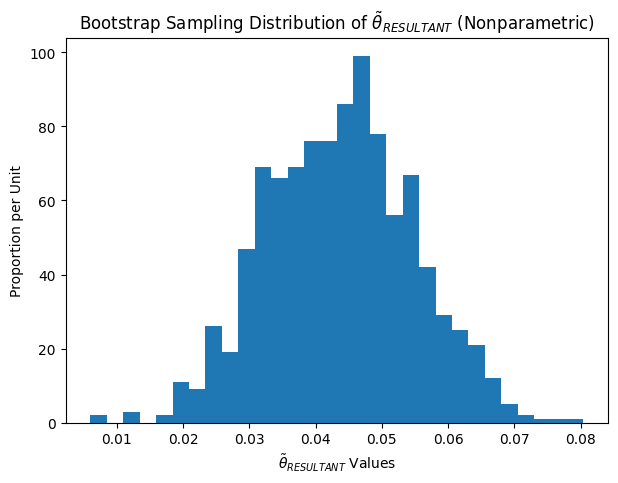

In [94]:
plt.figure(figsize = (7, 5))
plt.hist(theta_hat_sampling, bins = 30)
plt.xlabel("$\\tilde{\\theta}_{RESULTANT}$ Values")
plt.ylabel("Proportion per Unit")
plt.title("Bootstrap Sampling Distribution of $\\tilde{\\theta}_{RESULTANT}$ (Nonparametric)");
plt.show()

In [95]:
#We construct an approximate 95% confidence interval for the true coefficient and we also calculate the standard deviation and mean 
left_confidence_interval_endpoint = np.percentile(theta_hat_sampling, 2.5)
right_confidence_interval_endpoint = np.percentile(theta_hat_sampling, 97.5)

print(left_confidence_interval_endpoint, right_confidence_interval_endpoint)
print(np.std(theta_hat_sampling))
print(np.mean(theta_hat_sampling))

0.02309386675827301 0.06495355480059813
0.011045466236045664
0.04369990245131869


# Step 3

## ROC Curve

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [97]:
# Binarize the output
y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]

In [98]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [99]:
# Create classifiers
classifiers = {
    'Logit': sm.Logit(y_train.ravel(), X_train).fit(disp=0),
    'LDA': LDA().fit(X_train, y_train.ravel()),
    'QDA': QDA().fit(X_train, y_train.ravel()),
    'Naive Bayes': NB().fit(X_train, y_train.ravel()),
    'KNN': KNN().fit(X_train, y_train.ravel())
}


/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [100]:
# Compute ROC curve and ROC area for each classifier
fpr = dict()
tpr = dict()
roc_auc = dict()

for name, classifier in classifiers.items():
    y_score = classifier.predict(X_test)
    fpr[name], tpr[name], _ = roc_curve(y_test.ravel(), y_score)
    roc_auc[name] = auc(fpr[name], tpr[name])

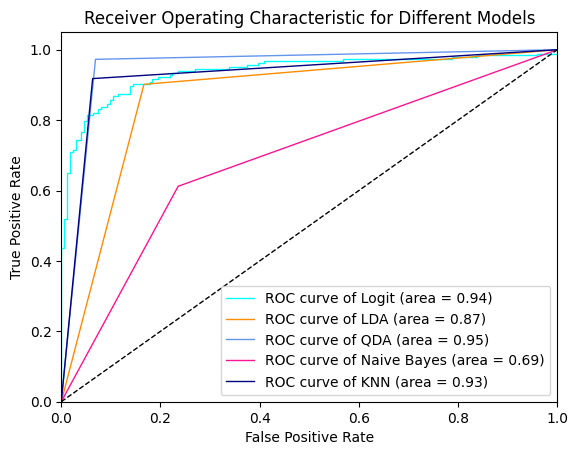

In [101]:
# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink', 'navy'])
for name, color in zip(classifiers.keys(), colors):
    plt.plot(fpr[name], tpr[name], color=color, lw=1,
             label='ROC curve of {0} (area = {1:0.2f})'.format(name, roc_auc[name]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Different Models')
plt.legend(loc="lower right")
plt.show()

# Step4

## Model Assesment

In [102]:
#We split the data again to be able to do cross-validation
test_data = testing_data.sample(frac=0.8, random_state=25)
validationtest_data = testing_data.drop(test_data.index)

print(f"No. of training examples: {test_data.shape[0]}")
print(f"No. of testing examples: {validationtest_data.shape[0]}")

No. of training examples: 57
No. of testing examples: 14


In [103]:
y_train, X_train = dmatrices('Class~XAVG+YAVG+ZAVG+XPEAK+YPEAK+ZPEAK+XVAR+YVAR+ZVAR+RESULTANT', test_data, return_type = 'dataframe')


In [104]:
y_test, X_test = dmatrices('Class~XAVG+YAVG+ZAVG+XPEAK+YPEAK+ZPEAK+XVAR+YVAR+ZVAR+RESULTANT', validationtest_data, return_type = 'dataframe')

### QDA

In [106]:
#We first perform the 80-20 cross validation 
sklearn_qda = QDA(priors=None,store_covariance=True) #creating a QDA object
qda = sklearn_qda.fit(X_train.iloc[:,1:11], y_train.iloc[:,1]) #learning the projection matrix
X_labels = qda.predict(X_train.iloc[:,1:11]) #gives you the predicted label for each sample
X_prob = qda.predict_proba(X_train.iloc[:,1:11]) #the probability of each sample to belong to each class

X_test_labels=qda.predict(X_test.iloc[:,1:11])
X_test_prob = qda.predict_proba(X_test.iloc[:,1:11]) 

print(np.mean(y_test.iloc[:,1]==X_test_labels))

0.9285714285714286


In [107]:
threshold = 0.5
confusion_matrix(y_test.iloc[:,1],X_test_prob[:,1]>=threshold)

array([[7, 0],
       [1, 6]])

In [108]:
from sklearn.model_selection import KFold, cross_val_score

In [109]:
#Now we perform the 10 fold cross validation
# Prepare the data
y, X = dmatrices('Class~XAVG+YAVG+ZAVG+XPEAK+YPEAK+ZPEAK+XVAR+YVAR+ZVAR+RESULTANT', testing_data, return_type='dataframe')
y = y.iloc[:, 1].values

np.random.seed(0)
n_split = 10
k_fold = KFold(n_splits=n_split)

accuracy_list = []

for train_index, test_index in k_fold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [110]:
X = X_train.iloc[:,1:11]
y = y_train

sklearn_qda = QDA(priors=None, store_covariance=True)

kf = KFold(n_splits=10, shuffle=True, random_state=0)

accuracy_list = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    qda = sklearn_qda.fit(X_train_cv, y_train_cv)

    X_test_labels = qda.predict(X_test_cv)
    X_test_prob = qda.predict_proba(X_test_cv)

    accuracy = np.mean(y_test_cv == X_test_labels)
    accuracy_list.append(accuracy)

qda_accuracy = np.mean(accuracy_list)
print(f"Average accuracy (QDA): {np.mean(qda_accuracy)}")

Average accuracy (QDA): 0.9047619047619048
